# CS500 - Data Science Tools and Technique 
**Bahar Ali**

**National University Of Computer and Emerging Sciences, Peshawar**.
 

# Pandas for Data Scientists

    In this notebook we will learn the basis of the Pandas library for data scientists. 
    
    Pandas is an open-source library built on top of numpy 
    Providing high-performance, easy-to-use data structures and data analysis tools. 
    It allows for fast analysis and data cleaning and preparation.

    The NumPy module works with the numerical data.
    Whereas, The Pandas module mainly works with the tabular data. 
    
    The NumPy module offers a powerful object called array.
    Whereas Pandas provides some sets of powerful tools like Series and DataFrame that mainly used for analyzing the data. 

    Numpy has a better performance with less number of rows (500K or less). 
    The Pandas module has a better performance with larger number of rows (500K or more). 
    
    Indexing of the pandas series is very slow as compared to numpy arrays

## Remember to Install Pandas 
!pip install pandas


    In the first cell we put the code to import the pandas library as pd. 
    This is for convenience; every time we need to use some functionality from the pandas library, we will write pd instead of pandas.

In [1]:
import pandas as pd

### DataFrames and DataSeries

The key data structure in Pandas is the **DataFrame** object. A DataFrame is basically a tabular data structure, with rows and columns. Rows have a specific index to access them, which can be any name or value. In Pandas, the columns are called **Series**, a special type of data structure, which in essence consists of a list of several values, where each value has an index. 
Therefore, the DataFrame data structure can be seen as a spreadsheet, but it is much more flexible. 


### Creating a new DataFrame  and DataSeries

To understand how it works, let us see how to create a Series and DataFrame.

### Creating new DataSeries from the scratch
How to create a DataFrame from a common Python list.

In [2]:
years = [2011, 2012, 2013, 2014, 2015]
s_years = pd.Series([2011, 2012, 2013, 2014, 2015])
s_years

0    2011
1    2012
2    2013
3    2014
4    2015
dtype: int64

In [3]:
order = [1, 2, 3, 4, 'a']
s_years = pd.Series(years, index=order) # The number of values in the order list must be equal to total records.
s_years

1    2011
2    2012
3    2013
4    2014
a    2015
dtype: int64

### Creating new DataSeries from the scratch
How to create a DataFrame from a common Python dictionary and lists.

In this example, we use the pandas `DataFrame` object constructor with a dictionary of lists as argument.
The value of each entry in the dictionary is the column, where key is the name of column and the lists are their values. 
The DataFrame columns can be arranged at construction time by entering a keyword **columns** with a list of the names of the columns ordered as we want. If the column keyword is not present in the constructor, the columns will be arranged in order given in dictionary.


In [4]:
data = {'year': [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],
        'team': ['FCBarcelona', 'FCBarcelona', 'FCBarcelona', 'RMadrid', 'RMadrid', 'RMadrid', 'ValenciaCF',
                 'ValenciaCF', 'ValenciaCF'],
        'wins':   [30, 28, 32, 29, 32, 26, 21, 17, 19],
        'draws':  [6, 7, 4, 5, 4, 7, 8, 10, 8],
        'loses': [2, 3, 2, 4, 2, 5, 9, 11, 11]
        }

#football = pd.DataFrame(data)
football = pd.DataFrame(data, columns=['team', 'year', 'wins', 'draws', 'loses'])
football.head()

team  year  wins  draws  loses
0  FCBarcelona  2010    30      6      2
1  FCBarcelona  2011    28      7      3
2  FCBarcelona  2012    32      4      2
3      RMadrid  2010    29      5      4
4      RMadrid  2011    32      4      2

### Creating new DataSeries from the DataSeries

In [5]:
years = pd.Series([2011, 2012, 2013, 2014, 2015])
prices = pd.Series([5000, 6000, 7000, 8000, 9000])

df = pd.DataFrame({'years': years, 'prices': prices})
df.head()

years  prices
0   2011    5000
1   2012    6000
2   2013    7000
3   2014    8000
4   2015    9000

The result is a table where each entry in the dictionary is a column. The index of each row is created automatically taking the position of its elements inside the entry lists, starting from 0.
Although it is very easy to create DataFrames from scratch, most of the time what we will need to do is import chunks of data into a DataFrame structure, we will see how to do this in later examples.

## Loading data into Pandas

In [6]:
import pandas as pd

#df = pd.read_csv('pokemon_data.csv')
#print(df.head(5))

#df_xlsx = pd.read_excel('pokemon_data.xlsx')
#print(df_xlsx.head(3))

df = pd.read_csv('pokemon_data.txt', delimiter='\t')
df.head()
#df[:5]
#df.shape

#                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

## Reading Data in Pandas

In [7]:
#### Read Headers
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
## Read each Column
df[['Name', 'Type 1', 'HP']].head()

## Read Each Row
df.iloc[1:3]

#      Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
1  2   Ivysaur  Grass  Poison  60      62       63       80       80     60   
2  3  Venusaur  Grass  Poison  80      82       83      100      100     80   

   Generation  Legendary  
1           1      False  
2           1      False

In [9]:
#for inde, row in df.iterrows():
#    print(inde, row['Name'])
    
#df.loc[df['Type 1'] == "Grass"]
df[df['Type 1'] == "Grass"]

## Read a specific location (Row,Column)
print(df.iloc[100,3])

Poison


## Sorting/Describing Data

In [10]:
df_sort = df.sort_values(['Type 1', 'HP'], ascending=[0,1])
df_sort.head()

#      Name Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
139  129  Magikarp  Water    NaN  20      10       55       15       20   
381  349    Feebas  Water    NaN  20      15       20       10       55   
97    90  Shellder  Water    NaN  30      65      100       45       25   
106   98    Krabby  Water    NaN  30     105       90       25       25   
125  116    Horsea  Water    NaN  30      40       70       70       25   

     Speed  Generation  Legendary  
139     80           1      False  
381     80           3      False  
97      40           1      False  
106     50           1      False  
125     60           1      False

## Making changes to the data

In [11]:
df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
df
#45+49+49+65+65+45

#                   Name   Type 1  Type 2  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison  45      49       49   
1      2                Ivysaur    Grass  Poison  60      62       63   
2      3               Venusaur    Grass  Poison  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison  80     100      123   
4      4             Charmander     Fire     NaN  39      52       43   
..   ...                    ...      ...     ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark  80     160       60   
799  721              Volcanion     Fire   Water  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total  
0         65       65     45           1      False    318  
1         80       80     60           1      False    405  
2        100      100     80           1      False    525  
3        122      120     80           1      False    625  
4         60       50     65           1      False    309  
..       ...      ...    ...         ...        ...    ...  
795      100      150     50           6       True    600  
796      160      110    110           6       True    700  
797      150      130     70           6       True    600  
798      170      130     80           6       True    680  
799      130       90     70           6       True    600  

[800 rows x 13 columns]

In [12]:
df = df.drop(columns=['Total'])
df

#                   Name   Type 1  Type 2  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison  45      49       49   
1      2                Ivysaur    Grass  Poison  60      62       63   
2      3               Venusaur    Grass  Poison  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison  80     100      123   
4      4             Charmander     Fire     NaN  39      52       43   
..   ...                    ...      ...     ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark  80     160       60   
799  721              Volcanion     Fire   Water  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 12 columns]

In [13]:
df['Total'] = df.iloc[:, 4:10].sum(axis=1)
df.head()

#                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  Total  
0       65     45           1      False    318  
1       80     60           1      False    405  
2      100     80           1      False    525  
3      120     80           1      False    625  
4       50     65           1      False    309

In [14]:
## In numpy axis==None by default. 
## In Panda axis = 0 by default. 
## axis = 0 along the rows (namely, index in pandas), 
## axis = 1 along the columns (namely, columns in pandas). 
## For clarity, one may choose to specify axis='index' (instead axis=0), and axis='columns' (instead axis=1).

In [15]:
cols = list(df.columns)
cols

['#',
 'Name',
 'Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary',
 'Total']

In [16]:
print(cols)
df2 = df[cols[0:4] + [cols[-1]] + cols[4:12]]
df2.head()

['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Total']


#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

## Saving our Data (Exporting into Desired Format)

In [17]:
#df.to_csv('modified.csv', index=False)
df.to_excel('modified.xlsx', index=False)
df.to_csv('modified.txt', index=False, sep='\t')

/home/baharali/anaconda3/lib/python3.8/site-packages/pandas/compat/_optional.py:123: UserWarning: Pandas requires version '1.0.2' or newer of 'xlsxwriter' (version '0.9.3' currently installed).
  warnings.warn(msg, UserWarning)


## Filtering Data

In [18]:
new_df = df.loc[(df['Type 1'] == 'Grass') | (df['Type 2'] == 'Poison') & (df['HP'] > 70)]
new_df.reset_index(drop=True, inplace=True)
new_df
new_df.to_csv('modified.csv')

In [19]:
new_df

#                   Name Type 1    Type 2   HP  Attack  Defense  \
0     1              Bulbasaur  Grass    Poison   45      49       49   
1     2                Ivysaur  Grass    Poison   60      62       63   
2     3               Venusaur  Grass    Poison   80      82       83   
3     3  VenusaurMega Venusaur  Grass    Poison   80     100      123   
4    43                 Oddish  Grass    Poison   45      50       55   
..  ...                    ...    ...       ...  ...     ...      ...   
66  650                Chespin  Grass       NaN   56      61       65   
67  651              Quilladin  Grass       NaN   61      78       95   
68  652             Chesnaught  Grass  Fighting   88     107      122   
69  672                 Skiddo  Grass       NaN   66      65       48   
70  673                 Gogoat  Grass       NaN  123     100       62   

    Sp. Atk  Sp. Def  Speed  Generation  Legendary  Total  
0        65       65     45           1      False    318  
1        80       80     60           1      False    405  
2       100      100     80           1      False    525  
3       122      120     80           1      False    625  
4        75       65     30           1      False    320  
..      ...      ...    ...         ...        ...    ...  
66       48       45     38           6      False    313  
67       56       58     57           6      False    405  
68       74       75     64           6      False    530  
69       62       57     52           6      False    350  
70       97       81     68           6      False    531  

[71 rows x 13 columns]

## Aggregate Statistics (Groupby)


In [20]:
df = pd.read_csv('pokemon_data.csv')
df_agr = df.groupby(['Type 1', 'Type 2']).count()

df_agr

#  Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2                                                             
Bug    Electric   2     2   2       2        2        2        2      2   
       Fighting   2     2   2       2        2        2        2      2   
       Fire       2     2   2       2        2        2        2      2   
       Flying    14    14  14      14       14       14       14     14   
       Ghost      1     1   1       1        1        1        1      1   
...              ..   ...  ..     ...      ...      ...      ...    ...   
Water  Ice        3     3   3       3        3        3        3      3   
       Poison     3     3   3       3        3        3        3      3   
       Psychic    5     5   5       5        5        5        5      5   
       Rock       4     4   4       4        4        4        4      4   
       Steel      1     1   1       1        1        1        1      1   

                 Generation  Legendary  
Type 1 Type 2                           
Bug    Electric           2          2  
       Fighting           2          2  
       Fire               2          2  
       Flying            14         14  
       Ghost              1          1  
...                     ...        ...  
Water  Ice                3          3  
       Poison             3          3  
       Psychic            5          5  
       Rock               4          4  
       Steel              1          1  

[136 rows x 10 columns]

In [21]:
df['count'] = 1
df.groupby(['Type 1', 'Type 2']).count().head()

#  Name  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2                                                             
Bug    Electric   2     2   2       2        2        2        2      2   
       Fighting   2     2   2       2        2        2        2      2   
       Fire       2     2   2       2        2        2        2      2   
       Flying    14    14  14      14       14       14       14     14   
       Ghost      1     1   1       1        1        1        1      1   

                 Generation  Legendary  count  
Type 1 Type 2                                  
Bug    Electric           2          2      2  
       Fighting           2          2      2  
       Fire               2          2      2  
       Flying            14         14     14  
       Ghost              1          1      1

In [22]:
df_agr = df[0:20].groupby(['Type 2']).min()
df_agr.head()

#                       Name Type 1  HP  Attack  Defense  Sp. Atk  \
Type 2                                                                      
Dragon  6  CharizardMega Charizard X   Fire  78     130      111      130   
Flying  6                 Butterfree    Bug  60      45       50       90   
Poison  1                   Beedrill    Bug  40      25       30       15   

        Sp. Def  Speed  Generation  Legendary  count  
Type 2                                                
Dragon       85    100           1      False      1  
Flying       80     70           1      False      1  
Poison       20     35           1      False      1

In [23]:
df_agr = df.groupby(['Type 1']).mean()
df_agr.head()

#         HP      Attack    Defense    Sp. Atk    Sp. Def  \
Type 1                                                                         
Bug       334.492754  56.884058   70.971014  70.724638  53.869565  64.797101   
Dark      461.354839  66.806452   88.387097  70.225806  74.645161  69.516129   
Dragon    474.375000  83.312500  112.125000  86.375000  96.843750  88.843750   
Electric  363.500000  59.795455   69.090909  66.295455  90.022727  73.704545   
Fairy     449.529412  74.117647   61.529412  65.705882  78.529412  84.705882   

              Speed  Generation  Legendary  count  
Type 1                                             
Bug       61.681159    3.217391   0.000000    1.0  
Dark      76.161290    4.032258   0.064516    1.0  
Dragon    83.031250    3.875000   0.375000    1.0  
Electric  84.500000    3.272727   0.090909    1.0  
Fairy     48.588235    4.117647   0.058824    1.0

In [24]:
df_agr = df.groupby(['Type 1']).std()
df_agr.head()

#         HP     Attack    Defense    Sp. Atk    Sp. Def  \
Type 1                                                                        
Bug       210.445160  16.328914  37.040904  33.617609  26.697055  32.126395   
Dark      176.022072  21.078297  25.774247  25.121982  33.200952  24.799020   
Dragon    170.190169  23.795415  33.742622  24.102938  42.257360  29.884843   
Electric  202.731063  17.306511  23.764169  24.757033  29.740340  22.601275   
Fairy     271.983942  23.587291  29.751298  18.979478  28.548462  29.721130   

              Speed  Generation  Legendary  count  
Type 1                                             
Bug       33.227599    1.598433   0.000000    0.0  
Dark      27.768203    1.353609   0.249731    0.0  
Dragon    23.239961    1.431219   0.491869    0.0  
Electric  26.691607    1.604697   0.290803    0.0  
Fairy     23.305200    2.147160   0.242536    0.0

In [25]:
df_agr = df.groupby(['Type 1']).sum()
df_agr

#    HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  \
Type 1                                                                        
Bug       23080  3925    4897     4880     3717     4471   4256         222   
Dark      14302  2071    2740     2177     2314     2155   2361         125   
Dragon    15180  2666    3588     2764     3099     2843   2657         124   
Electric  15994  2631    3040     2917     3961     3243   3718         144   
Fairy      7642  1260    1046     1117     1335     1440    826          70   
Fighting   9824  1886    2613     1780     1434     1747   1784          91   
Fire      17025  3635    4408     3524     4627     3755   3871         167   
Flying     2711   283     315      265      377      290    410          22   
Ghost     15568  2062    2361     2598     2539     2447   2059         134   
Grass     24141  4709    5125     4956     5425     4930   4335         235   
Ground    11401  2361    3064     2715     1807     2008   2045         101   
Ice       10165  1728    1746     1714     1861     1831   1523          85   
Normal    31279  7573    7200     5865     5470     6245   7012         299   
Poison     7050  1883    2091     1927     1692     1803   1780          71   
Psychic   21706  4026    4073     3858     5609     4918   4645         193   
Rock      17280  2876    4086     4435     2787     3321   2460         152   
Steel     11957  1761    2503     3412     1823     2177   1492         104   
Water     33946  8071    8305     8170     8379     7898   7388         320   

          Legendary  count  
Type 1                      
Bug               0     69  
Dark              2     31  
Dragon           12     32  
Electric          4     44  
Fairy             1     17  
Fighting          0     27  
Fire              5     52  
Flying            2      4  
Ghost             2     32  
Grass             3     70  
Ground            4     32  
Ice               2     24  
Normal            2     98  
Poison            0     28  
Psychic          14     57  
Rock              4     44  
Steel             4     27  
Water             4    112

<AxesSubplot:ylabel='Density'>

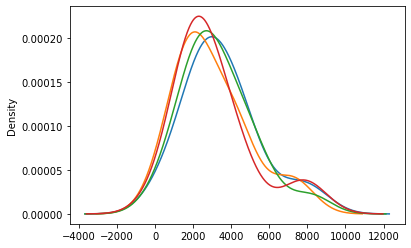

In [26]:
# Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) 

df_agr = df.groupby(['Type 1']).sum()
df_agr['Attack'].plot.kde()
df_agr['Speed'].plot.kde()
df_agr['Defense'].plot.kde()
df_agr['HP'].plot.kde()


#ax = df_agr.plot.kde()


<AxesSubplot:ylabel='Density'>

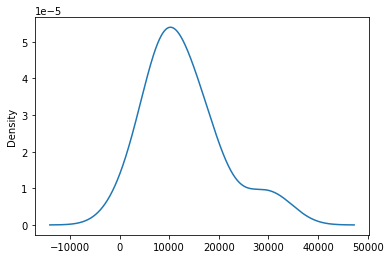

In [27]:
df_agr = df.groupby(['Type 1']).sum()
df_agr['Total'] = df_agr['Attack'] + df_agr['Speed'] + df_agr['Defense'] + df_agr['HP']
df_agr['Total'].plot.kde()


In [28]:
#df_agr.plot.hist(bins=50, alpha=0.5)


<AxesSubplot:ylabel='Frequency'>

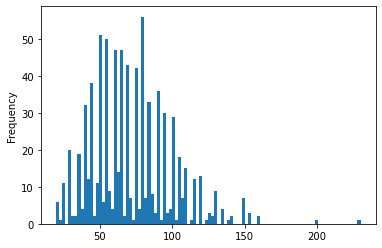

In [29]:
df['Sp. Def'].plot.hist(bins=100, alpha=1)


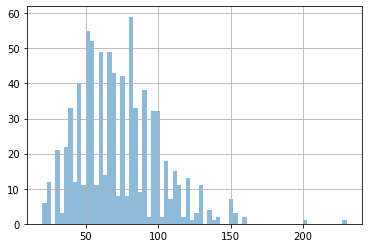

In [30]:
hist = df['Sp. Def'].hist(bins=70, alpha=0.5)

In [31]:
a = "0000000000"
a = a[0:5]

## Working with large amounts of data



In [32]:
#print(df.columns)
new_df = pd.DataFrame(columns=df.columns)

# Drop 'Type 1' column as we are going to group data using this fields, 
# so this column no more remain as column of data frame
new_df.drop('Type 1', axis=1, inplace=True)
#print(new_df)

for df in pd.read_csv('pokemon_data.csv', chunksize=5):
    results = df.groupby(['Type 1']).count()
    new_df = pd.concat([new_df, results])
    #print(results)
    #print(new_df)

new_df.tail()
#df['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']


# Name Type 2 HP Attack Defense Sp. Atk Sp. Def Speed Generation  \
Fairy    1    1      0  1      1       1       1       1     1          1   
Flying   2    2      2  2      2       2       2       2     2          2   
Fire     1    1      1  1      1       1       1       1     1          1   
Psychic  2    2      2  2      2       2       2       2     2          2   
Rock     2    2      2  2      2       2       2       2     2          2   

        Legendary count  
Fairy           1   NaN  
Flying          2   NaN  
Fire            1   NaN  
Psychic         2   NaN  
Rock            2   NaN

In [33]:
new_df['Type 1'] = new_df.index
new_df.tail()


# Name Type 2 HP Attack Defense Sp. Atk Sp. Def Speed Generation  \
Fairy    1    1      0  1      1       1       1       1     1          1   
Flying   2    2      2  2      2       2       2       2     2          2   
Fire     1    1      1  1      1       1       1       1     1          1   
Psychic  2    2      2  2      2       2       2       2     2          2   
Rock     2    2      2  2      2       2       2       2     2          2   

        Legendary count   Type 1  
Fairy           1   NaN    Fairy  
Flying          2   NaN   Flying  
Fire            1   NaN     Fire  
Psychic         2   NaN  Psychic  
Rock            2   NaN     Rock

In [34]:
df2 = new_df[new_df['Type 1']  == 'Fairy']
df2.head()

# Name Type 2 HP Attack Defense Sp. Atk Sp. Def Speed Generation  \
Fairy  2    2      0  2      2       2       2       2     2          2   
Fairy  2    2      0  2      2       2       2       2     2          2   
Fairy  1    1      1  1      1       1       1       1     1          1   
Fairy  2    2      0  2      2       2       2       2     2          2   
Fairy  1    1      1  1      1       1       1       1     1          1   

      Legendary count Type 1  
Fairy         2   NaN  Fairy  
Fairy         2   NaN  Fairy  
Fairy         1   NaN  Fairy  
Fairy         2   NaN  Fairy  
Fairy         1   NaN  Fairy

In [35]:
df2 = new_df.iloc[new_df.index == 'Fairy']
df2.head()

# Name Type 2 HP Attack Defense Sp. Atk Sp. Def Speed Generation  \
Fairy  2    2      0  2      2       2       2       2     2          2   
Fairy  2    2      0  2      2       2       2       2     2          2   
Fairy  1    1      1  1      1       1       1       1     1          1   
Fairy  2    2      0  2      2       2       2       2     2          2   
Fairy  1    1      1  1      1       1       1       1     1          1   

      Legendary count Type 1  
Fairy         2   NaN  Fairy  
Fairy         2   NaN  Fairy  
Fairy         1   NaN  Fairy  
Fairy         2   NaN  Fairy  
Fairy         1   NaN  Fairy

In [36]:
df2 = new_df[new_df.index.isin(['Fairy', 'Fire'])]
df2.head()

# Name Type 2 HP Attack Defense Sp. Atk Sp. Def Speed Generation  \
Fire   1    1      0  1      1       1       1       1     1          1   
Fire   4    4      3  4      4       4       4       4     4          4   
Fairy  2    2      0  2      2       2       2       2     2          2   
Fire   2    2      0  2      2       2       2       2     2          2   
Fire   2    2      0  2      2       2       2       2     2          2   

      Legendary count Type 1  
Fire          1   NaN   Fire  
Fire          4   NaN   Fire  
Fairy         2   NaN  Fairy  
Fire          2   NaN   Fire  
Fire          2   NaN   Fire